### Line Charts in Matplotlib

### 1. What is a Line Chart?

A line chart (or line plot) connects individual data points with straight lines. It’s great for showing trends over time or ordered categories.

### 2. Key Components of a Line Chart:

Component	Description

X-axis	Independent variable (e.g., time, categories)

Y-axis	Dependent variable (e.g., values, measurements)

Line	Connects data points to show trends or progression

Markers	Optional symbols at data points for better visibility

Legend	Explains different lines if there are multiple datasets

Grid	Helps visually align points on axes

Title & Labels	Gives context to what is being shown

### 3. Matplotlib’s Basic Line Chart Functions:

plt.plot() or ax.plot() is the core function to create a line chart.

Arguments let you control color, line style, marker style, width, etc.

You can plot multiple lines by calling plot() multiple times on the same axes.

### 4. Why use Line Charts?

Show data trends (up/down/steady)

Compare multiple groups over a continuous variable (e.g., time)

Identify peaks, valleys, cycles, or sudden changes

### 5. Customizing Line Charts:

Line style: Solid, dashed, dotted, dash-dot ('-', '--', ':', '-.'')

Markers: Circles, squares, triangles, stars ('o', 's', '^', '*')

Colors: Named colors or hex color codes

Axis limits: Focus on a specific range of data

Annotations: Highlight special points or events

Grid lines: Improve readability

Legends: Differentiate multiple lines

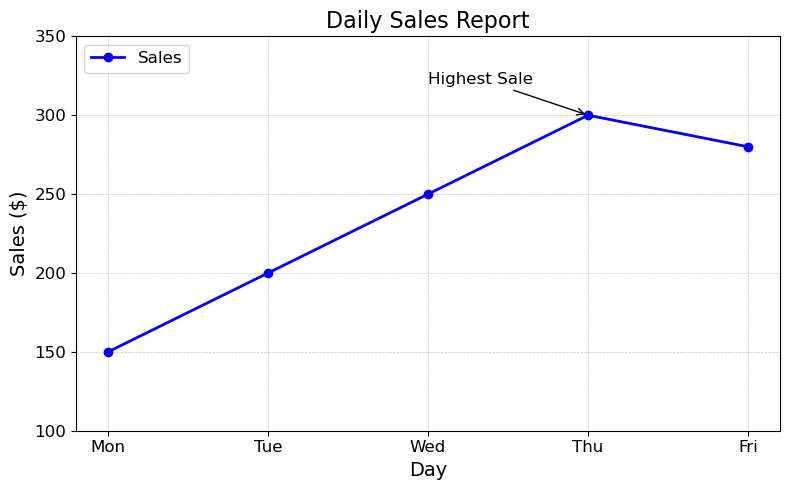

In [2]:
import matplotlib.pyplot as plt

# Data: Days of the week vs sales amount
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
sales = [150, 200, 250, 300, 280]

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Plot line with marker, color, and label
ax.plot(days, sales, color='blue', linestyle='-', linewidth=2, marker='o', label='Sales')

# Add title and axis labels with font sizes
ax.set_title("Daily Sales Report", fontsize=16)
ax.set_xlabel("Day", fontsize=14)
ax.set_ylabel("Sales ($)", fontsize=14)

# Customize ticks
ax.set_xticks(days)
ax.tick_params(axis='x', labelrotation=0, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add grid for easier visualization
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend at top left
ax.legend(loc='upper left', fontsize=12)

# Set y-axis limits (optional)
ax.set_ylim(100, 350)

# Annotate the highest sales point
ax.annotate('Highest Sale', xy=('Thu', 300), xytext=('Wed', 320),
            arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=12)

# Adjust layout for neatness
plt.tight_layout()

# Show plot
plt.show()


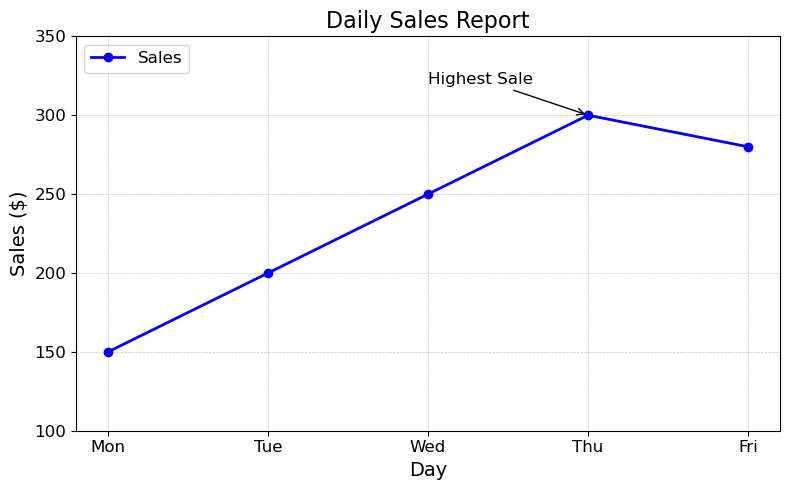


### ✅ What is a Stacked Line Chart?

A **stacked line chart** is a variation of a regular line chart where the lines are stacked on top of each other to show the **cumulative total** at each point. It is often used to visualize the **contribution of each group over time** or other continuous axes.

However, **Matplotlib does not have a built-in `stacked line chart`** method like it does for stacked bar charts. So we **simulate** it using the **cumulative sum** of each line.

---

### ✅ When to Use a Stacked Line Chart?

| Use Case                                 | Why Stacked Line Works                    |
| ---------------------------------------- | ----------------------------------------- |
| Showing contribution of parts to a whole | Shows how each category adds to the total |
| Time series data by group                | Helps track cumulative changes            |
| Comparing groups over time               | Easy to see relative positions            |

---

### ✅ How to Build It in Matplotlib?

1. Prepare each line as a separate series (Y1, Y2, Y3, etc.).
2. Use `np.cumsum()` or manually add the previous line values to stack the next one.
3. Plot them one on top of the other.

---




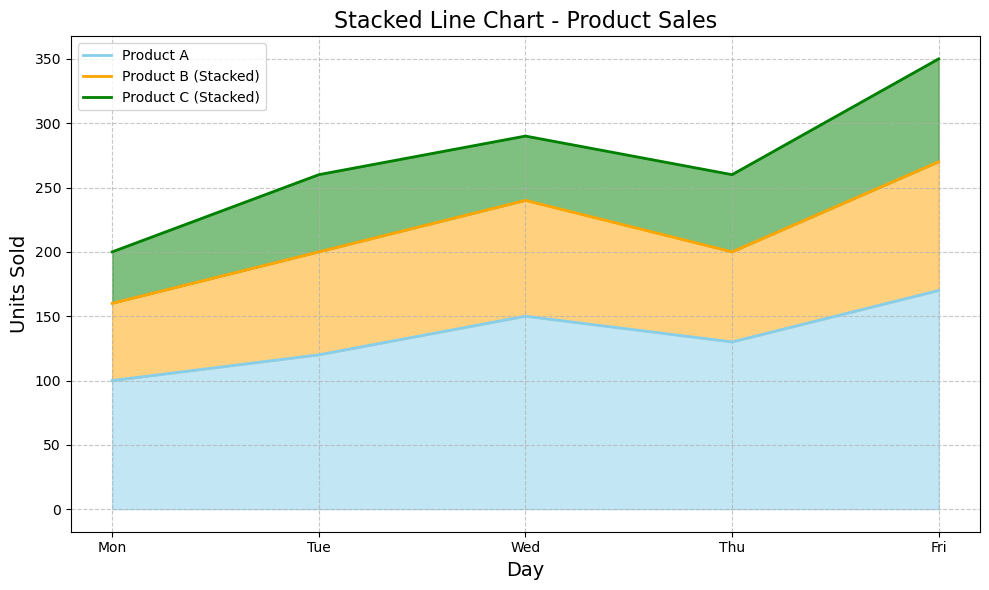

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Days of the week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Sales data for 3 product types
product_A = np.array([100, 120, 150, 130, 170])
product_B = np.array([60, 80, 90, 70, 100])
product_C = np.array([40, 60, 50, 60, 80])

# Cumulative stacking
product_B_cumulative = product_A + product_B
product_C_cumulative = product_B_cumulative + product_C

# Create plot
plt.figure(figsize=(10, 6))

# Bottom line (Product A)
plt.plot(days, product_A, label='Product A', color='skyblue', linewidth=2)
# Middle line (Product B stacked on A)
plt.plot(days, product_B_cumulative, label='Product B (Stacked)', color='orange', linewidth=2)
# Top line (Product C stacked on B)
plt.plot(days, product_C_cumulative, label='Product C (Stacked)', color='green', linewidth=2)

# Fill between for stacked appearance
plt.fill_between(days, 0, product_A, color='skyblue', alpha=0.5)
plt.fill_between(days, product_A, product_B_cumulative, color='orange', alpha=0.5)
plt.fill_between(days, product_B_cumulative, product_C_cumulative, color='green', alpha=0.5)

# Titles and labels
plt.title('Stacked Line Chart - Product Sales', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Units Sold', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()

# Show chart
plt.show()




### ✅ What is a Dual Axis Chart?

A **dual axis chart** (or **secondary axis chart**) lets you plot **two datasets with different scales** on the **same plot**, each with its own y-axis.

* The **left y-axis** is the primary axis.
* The **right y-axis** is the secondary axis.
* The **x-axis is shared**.

---

### ✅ Why Use Dual Axis?

| Use Case                               | Example                              |
| -------------------------------------- | ------------------------------------ |
| Different units of measurement         | Sales (Rs) vs. Units sold            |
| Comparing trends with different scales | Temperature (°C) vs. Ice cream sales |
| Better space utilization               | Saves subplot area                   |

---

### ✅ When to Avoid?

* If the scales confuse users.
* If both variables are unrelated — that might **mislead** viewers.

---




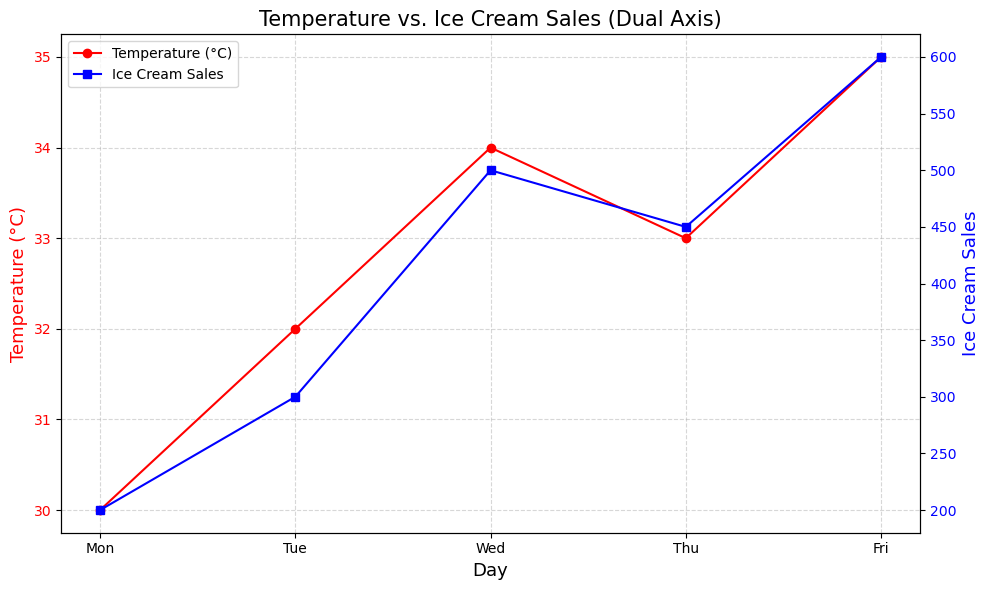

In [12]:
import matplotlib.pyplot as plt

# Sample data
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
temperature = [30, 32, 34, 33, 35]         # Celsius
ice_cream_sales = [200, 300, 500, 450, 600]  # Units sold

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Temperature on primary y-axis
ax1.plot(days, temperature, color='red', marker='o', label='Temperature (°C)')
ax1.set_xlabel('Day', fontsize=13)
ax1.set_ylabel('Temperature (°C)', color='red', fontsize=13)
ax1.tick_params(axis='y', labelcolor='red')

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot Ice Cream Sales on secondary y-axis
ax2.plot(days, ice_cream_sales, color='blue', marker='s', label='Ice Cream Sales')
ax2.set_ylabel('Ice Cream Sales', color='blue', fontsize=13)
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and grid
plt.title('Temperature vs. Ice Cream Sales (Dual Axis)', fontsize=15)
ax1.grid(True, linestyle='--', alpha=0.5)

# Optional: Add legends (custom way)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()



## 🔍 **Challenges & Solutions of Dual Axis Line Charts**

---

### ⚠️ 1. **Misleading Interpretation**

**Problem:**
Viewers may assume both lines share the same scale — leading to **false conclusions**.

**Example:**
A small increase in one variable may appear larger than a big change in another, just because their axes differ.

**✅ Solution:**

* Use **different colors** and clearly label **each axis** with units.
* Add a **title/subtitle** explaining the dual axes.
* Optionally, **annotate** each line with what it represents.

---

### ⚠️ 2. **Visual Clutter & Overlapping Lines**

**Problem:**
Two datasets on one chart can clutter the graph, especially if values cross over or overlap.

**✅ Solution:**

* Use **different line styles** (`--`, `-`, `:`) or **markers**.
* Apply **transparency (alpha)** to soften one line.
* Limit chart to **5–7 data points** per line to reduce noise.

---

### ⚠️ 3. **Difficult Axis Scaling**

**Problem:**
Choosing the right scale for each y-axis is hard. If not done properly, the lines may look too flat or exaggerated.

**✅ Solution:**

* Let matplotlib auto-scale, but also experiment with:

  ```python
  ax1.set_ylim(min1, max1)
  ax2.set_ylim(min2, max2)
  ```
* Or use **standardized data** (z-scores) if you only care about trends.

---

### ⚠️ 4. **Legends Becoming Confusing**

**Problem:**
Legends may mix both lines’ labels into one, or be shown only for one axis.

**✅ Solution:**
Manually combine and customize the legend:

```python
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2)
```

---

### ⚠️ 5. **Too Many Axes (More than 2)**

**Problem:**
Sometimes users try to add a third y-axis — this is almost always confusing.

**✅ Solution:**
Never use more than 2 y-axes. If needed:

* **Split the plot into subplots**.
* Use **normalized scales** or **z-scores** to show multiple trends on one axis.

---

### ⚠️ 6. **Accessibility Issues (Colorblindness, Small Screens)**

**Problem:**
Color-only distinction may not work for colorblind users or mobile viewers.

**✅ Solution:**

* Use **both color + shape** (e.g. circles for one line, squares for another).
* Add **annotations** or **data labels**.
* Use **high-contrast** color pairs (like red/blue or green/purple).

---

### ⚠️ 7. **Difficult to Automate in Reports**

**Problem:**
Dual-axis plots can break in automated dashboards or PDFs where plot elements shift.

**✅ Solution:**

* Always use `tight_layout()` to fix spacing.
* Save charts using:

  ```python
  plt.savefig('chart.png', bbox_inches='tight')
  ```

---

## ✅ Summary Table

| **Challenge**             | **Solution**                             |
| ------------------------- | ---------------------------------------- |
| Misleading interpretation | Label axes clearly, use distinct colors  |
| Visual clutter            | Use markers, line styles, limit data     |
| Axis scaling difficulty   | Customize `set_ylim()` or normalize data |
| Confusing legends         | Manually combine both legends            |
| Too many axes             | Limit to 2, use subplots or z-scores     |
| Accessibility issues      | Combine shape + color, annotate points   |
| Automation issues         | Use `tight_layout()` and `savefig()`     |

---




### ✅ What is a Bar Chart?

A **bar chart** is a graphical display of **categorical data** using rectangular bars. The **length/height** of each bar represents the **value** of each category.

* **Vertical bars**: Used when categories are few and labels are short.
* **Horizontal bars**: Ideal when labels are long or there are many categories.

---

### 📚 Use Cases:

* Comparing quantities across **categories**
* **Rankings** or **performance comparison**
* Visualizing **counts** (like frequency of values)

---

## 📘 Types of Bar Charts

| Type             | Description                     | Use When...                          |
| ---------------- | ------------------------------- | ------------------------------------ |
| Vertical Bar     | Bars go upward                  | Most common, categories on x-axis    |
| Horizontal Bar   | Bars go sideways                | Category names are long or many      |
| Grouped Bar      | Multiple bars per category      | Compare sub-groups within categories |
| Stacked Bar      | One bar split into parts        | See total + part contributions       |
| 100% Stacked Bar | Normalized to 100% per category | See part-to-whole comparison         |

---
#### Code Examples: Bar Charts in Python

We’ll use both Matplotlib and Seaborn for variety and professional usage.



| Problem                    | Solution                                                 |
| -------------------------- | -------------------------------------------------------- |
| Too many bars              | Filter top categories or use interactive/scrolling plots |
| Overlapping labels         | Rotate or shorten labels                                 |
| No zero-baseline           | Always start y-axis at 0 for bar charts                  |
| Misleading 3D              | Avoid 3D visuals for bars                                |
| Difficult to compare stack | Use grouped bars or label segments                       |

---



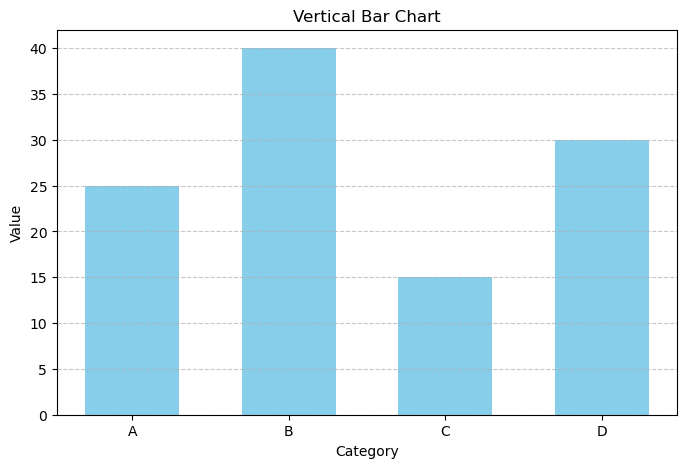

In [19]:
#Vertical Bar Chart- Compare values across categories using vertical bars.

categories = ['A', 'B', 'C', 'D']
values = [25, 40, 15, 30]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='skyblue', width=0.6)
plt.title('Vertical Bar Chart')
plt.xlabel('Category')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


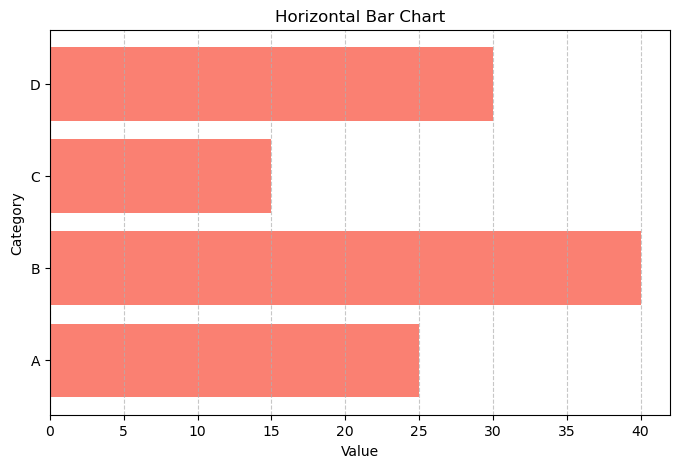

In [21]:
#Horizontal Bar Chart- Better when labels are long or there are many categories.
plt.figure(figsize=(8, 5))
plt.barh(categories, values, color='salmon')
plt.title('Horizontal Bar Chart')
plt.xlabel('Value')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



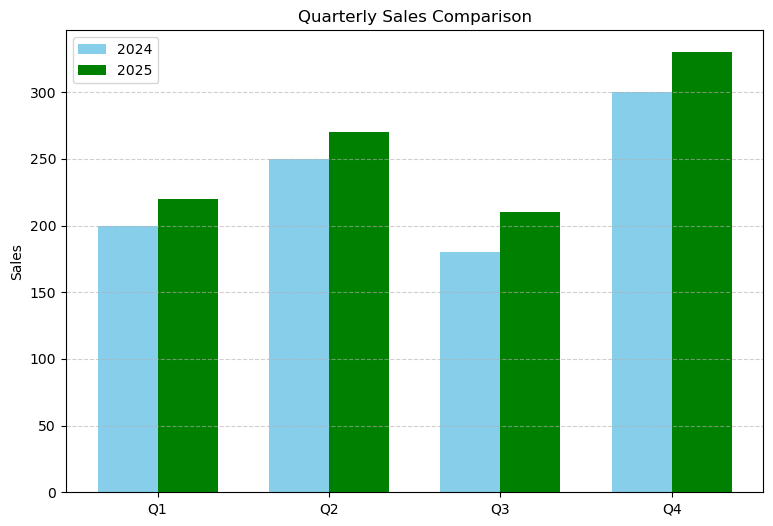

In [37]:
# Grouped Bar Chart-Compare sub-categories 


labels = ['Q1', 'Q2', 'Q3', 'Q4']
sales_2024 = [200, 250, 180, 300]
sales_2025 = [220, 270, 210, 330]

x = np.arange(len(labels))  # Label locations
width = 0.35

plt.figure(figsize=(9, 6))
plt.bar(x - width/2, sales_2024, width, label='2024', color='skyblue')
plt.bar(x + width/2, sales_2025, width, label='2025', color='green')

plt.ylabel('Sales')
plt.title('Quarterly Sales Comparison')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


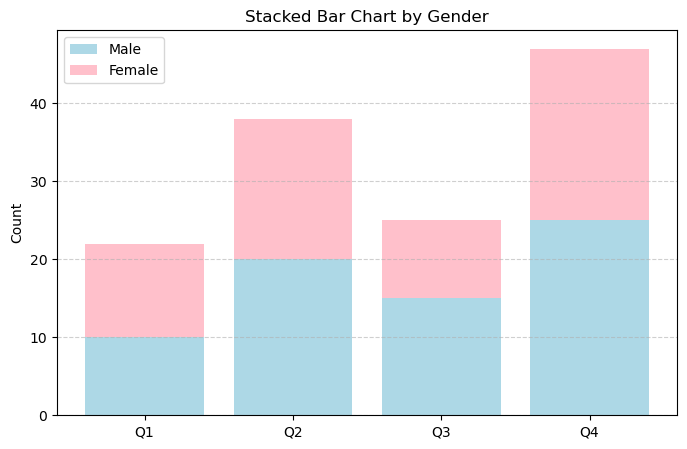

In [25]:
#Stacked Bar Chart-Show total and sub-group contribution.
male = [10, 20, 15, 25]
female = [12, 18, 10, 22]

plt.figure(figsize=(8, 5))
plt.bar(labels, male, label='Male', color='lightblue')
plt.bar(labels, female, bottom=male, label='Female', color='pink')

plt.ylabel('Count')
plt.title('Stacked Bar Chart by Gender')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


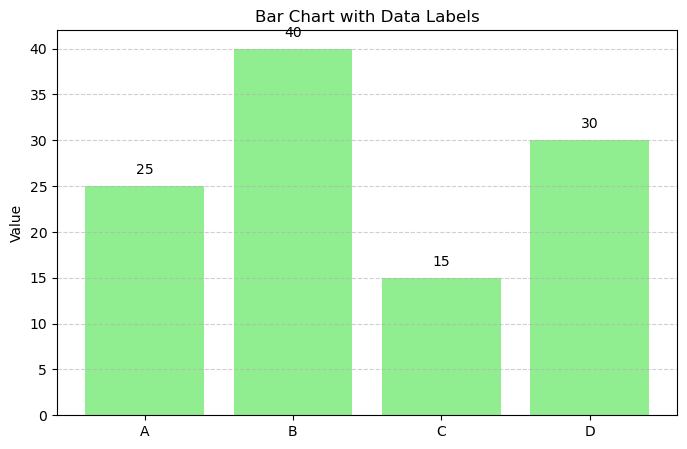

In [27]:
# Bar Chart with Data Labels-Makes bar values clear without reading y-axis.
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color='lightgreen')

# Add data labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, str(yval), ha='center', va='bottom')

plt.title('Bar Chart with Data Labels')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


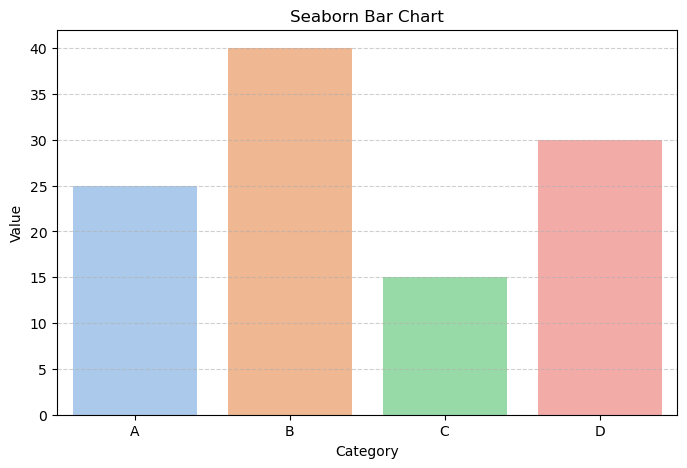

In [31]:
#Seaborn Bar Chart-Uses seaborn.barplot() – supports confidence intervals, ordering, etc.
import seaborn as sns
import pandas as pd

# Sample DataFrame
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Value': [25, 40, 15, 30]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Category', y='Value', hue='Category', palette='pastel', legend=False)
plt.title('Seaborn Bar Chart')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### 📊 Combo Charts in Matplotlib — Theory + Code
A combo chart combines two or more chart types (e.g., bar + line, or multiple lines with dual axes) in one plot to show relationships between different data aspects.

### ✅ Use Cases for Combo Charts:
Compare categories (bar) with trends (line).

Visualize different metrics with different scales.

Overlay targets or benchmarks over actual values.

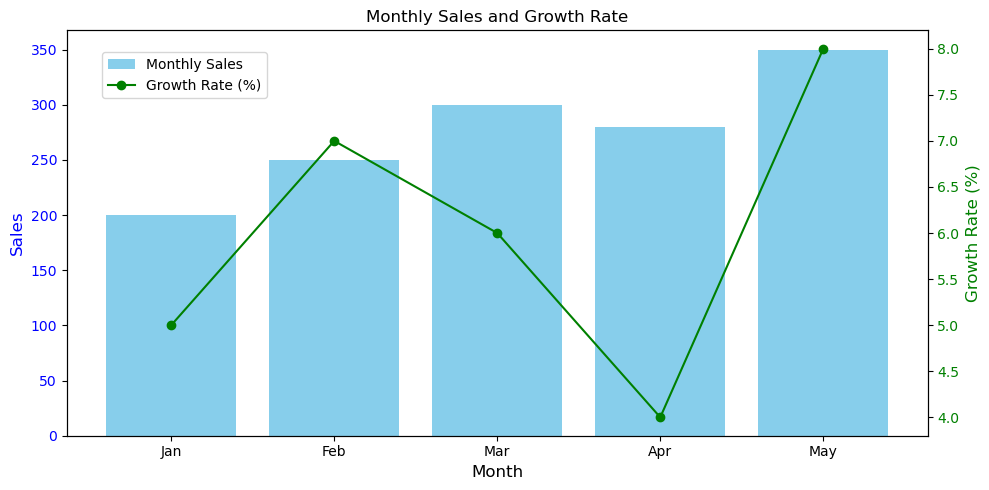

In [2]:
# Matplotlib Combo Chart Example (Bar + Line)
import matplotlib.pyplot as plt
import numpy as np

# Example data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
sales = [200, 250, 300, 280, 350]         # Bar chart data
growth_rate = [5, 7, 6, 4, 8]             # Line chart data

x = np.arange(len(months))

fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart on primary y-axis
bars = ax1.bar(x, sales, color='skyblue', label='Monthly Sales')
ax1.set_ylabel('Sales', fontsize=12, color='blue')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(months)
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart on secondary y-axis
ax2 = ax1.twinx()
line = ax2.plot(x, growth_rate, color='green', marker='o', label='Growth Rate (%)')
ax2.set_ylabel('Growth Rate (%)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and Legends
plt.title('Monthly Sales and Growth Rate')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()



## ✅ Challenges & Solutions in Advanced Bar Charts

| 🔧 **Challenge**                             | 🧠 **Description**                                                               | ✅ **Solution**                                                                                        |
| -------------------------------------------- | -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------- |
| **1. Overlapping Labels**                    | Long category names or many bars make labels overlap or unreadable.              | Rotate x-axis labels (`plt.xticks(rotation=45)`), use `tight_layout()`, or adjust `figsize`.          |
| **2. Custom Color Mapping**                  | Need distinct colors for groups, categories, or highlights.                      | Use `palette=` in seaborn or `color=` list in `matplotlib`. You can create custom color maps.         |
| **3. Grouped Bars Misaligned**               | Grouped bar charts can get misaligned if x-ticks or index are not set correctly. | Use `np.arange()` and manually shift bar positions.                                                   |
| **4. Annotating Bars**                       | Adding data labels on top of bars can clutter or go outside the chart.           | Loop through `bar_container` and use `ax.text()` with padding. Adjust limits or use `ax.bar_label()`. |
| **5. Multiple Categories (Grouped/Stacked)** | Difficult to manage bar positions and legend clarity.                            | Use pivoted DataFrames for grouped bars. For stacked, use `bottom=` param to stack heights manually.  |
| **6. Dual Axes Confusion**                   | When combining bars and lines, axis labels may confuse users.                    | Use `twinx()` properly and color-code labels to match plot elements. Always show a clear legend.      |
| **7. Legends Overlapping Plot**              | In multi-bar or combo charts, legends may cover data.                            | Use `plt.legend(loc='upper left', bbox_to_anchor=(1,1))` to move it outside.                          |
| **8. Negative Values in Bars**               | Bars below x-axis may not display well or cause misinterpretation.               | Handle using different color for negative bars, and set appropriate `ylim`.                           |
| **9. Difficult to Compare Heights**          | Too many bars make visual comparison hard.                                       | Use **horizontal bar charts** (`barh()`), group aggregation, or interactive tools like `plotly`.      |
| **10. Exporting High-Quality Images**        | PNGs may appear blurry or low-res in reports.                                    | Use `plt.savefig('chart.png', dpi=300, bbox_inches='tight')` for high-quality exports.                |

---

### ✅ Tips for Better Advanced Bar Charts:

* Use **color encoding** wisely for emphasis (e.g., highlight top performer).
* Prefer **horizontal bars** when category names are long.
* Add **data labels** only when needed and keep font size readable.
* Consider **interactive charts** using Plotly or Altair for large data.
* Always **sort categories** logically (e.g., descending order, time).

---



### ✅ 1. Pie Chart
A pie chart shows proportions of a whole. Each slice represents a category's percentage out of 100%.

Best for: part-to-whole relationships.

Not ideal if: you have too many categories or similar values.

### ✅ 2. Donut Chart
A donut chart is a pie chart with a hole in the middle.

Offers the same insight as a pie chart but leaves space for text or labels inside the circle.



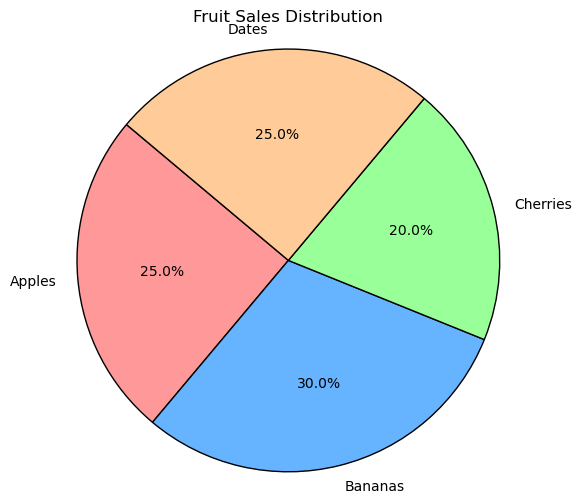

In [8]:
#Pie Chart
import matplotlib.pyplot as plt

# Sample data
labels = ['Apples', 'Bananas', 'Cherries', 'Dates']
sizes = [25, 30, 20, 25]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor':'black'})

plt.title('Fruit Sales Distribution')
plt.axis('equal')  # Equal aspect ratio makes it a perfect circle
plt.show()


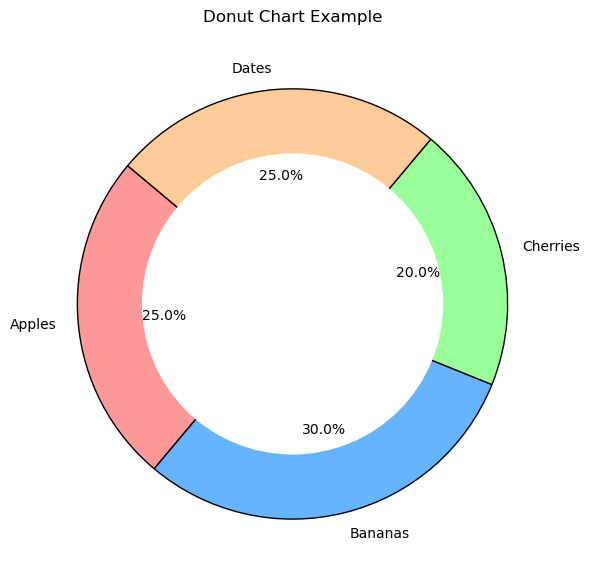

In [10]:
#Donut Chart
import matplotlib.pyplot as plt

# Sample data
labels = ['Apples', 'Bananas', 'Cherries', 'Dates']
sizes = [25, 30, 20, 25]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create pie chart with hole
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors,
                                   autopct='%1.1f%%', startangle=140, 
                                   wedgeprops={'edgecolor':'black'})

# Draw white circle in center to make donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Donut Chart Example')
plt.axis('equal')  
plt.tight_layout()
plt.show()


### Challenges & Solutions in Pie/Donut Charts
| 🛠 Challenge                    | 🔎 Description                      | ✅ Solution                                              |
| ------------------------------- | ----------------------------------- | ------------------------------------------------------- |
| Too many slices                 | Hard to read if too many categories | Group small categories into "Others"                    |
| Similar-sized slices            | Visually confusing                  | Add **labels with %** and sort slices                   |
| Label clutter                   | Overlapping text                    | Use `autopct`, limit number of slices, or use legends   |
| Not accurate                    | Humans are bad at comparing angles  | Use **bar or stacked bar charts** if accuracy is key    |
| Customizing colors              | Want more control                   | Use custom hex color codes or `matplotlib.cm` colormaps |
| Adding values to center (donut) | Needed for summary                  | Manually add `plt.text(0,0,"Total",...)` or KPI         |


###  Scatter Plot
A scatter plot shows the relationship between two numerical variables. Each point represents an observation.

X-axis: Independent variable

Y-axis: Dependent variable

Used for: Correlation, clustering, outliers

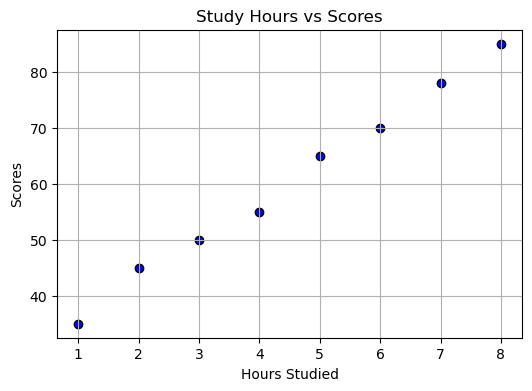

In [14]:
#Basic Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8],
    'Scores': [35, 45, 50, 55, 65, 70, 78, 85]
})

# Scatter plot using matplotlib
plt.figure(figsize=(6,4))
plt.scatter(data['Hours_Studied'], data['Scores'], color='blue', edgecolor='black')
plt.title('Study Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.grid(True)
plt.show()


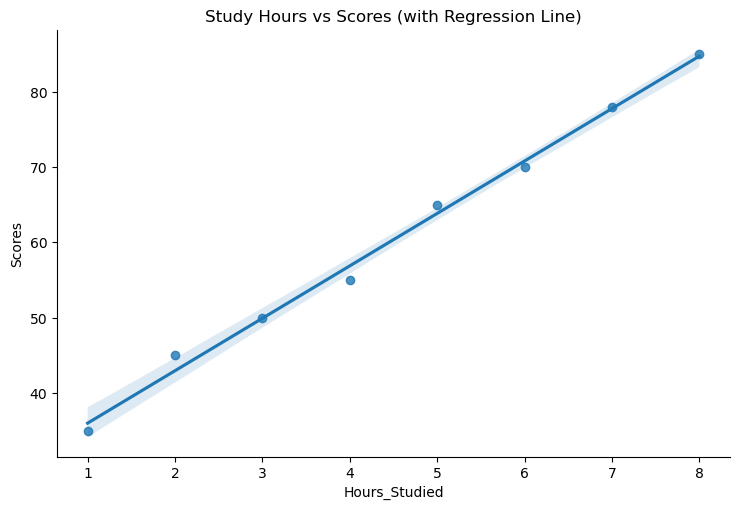

In [16]:
#With Seaborn (includes regression line)
sns.lmplot(data=data, x='Hours_Studied', y='Scores', height=5, aspect=1.5)
plt.title('Study Hours vs Scores (with Regression Line)')
plt.show()


### Bubble Chart
A bubble chart is a scatter plot with a third numerical variable encoded as size of the bubble.

X and Y → two features

Size → third feature (e.g., population, price)

Color → optional fourth dimension (e.g., region)

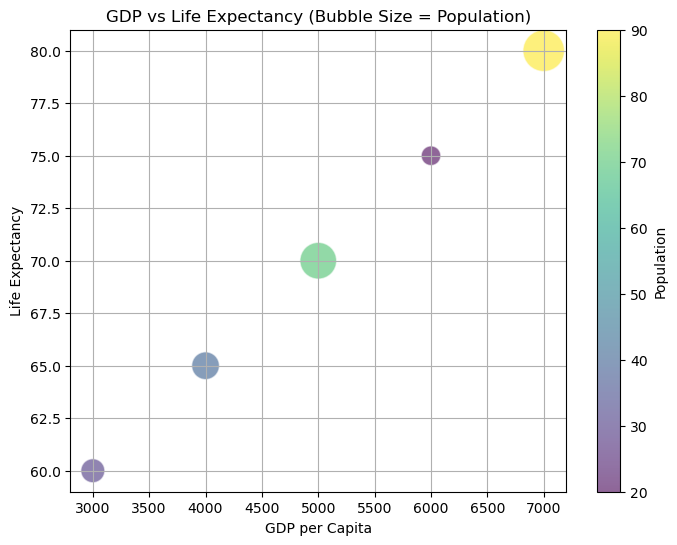

In [22]:
# Bubble Chart
# Sample data
df = pd.DataFrame({
    'GDP': [3000, 4000, 5000, 6000, 7000],
    'Life_Expectancy': [60, 65, 70, 75, 80],
    'Population': [30, 40, 70, 20, 90],  # used as bubble size
    'Continent': ['Asia', 'Europe', 'Africa', 'Asia', 'Europe']
})

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['GDP'], 
    df['Life_Expectancy'], 
    s=df['Population']*10,  # scale bubble size
    c=df['Population'], 
    cmap='viridis', 
    alpha=0.6, edgecolors='w', linewidth=1
)

plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('GDP vs Life Expectancy (Bubble Size = Population)')
plt.colorbar(scatter, label='Population')
plt.grid(True)
plt.show()


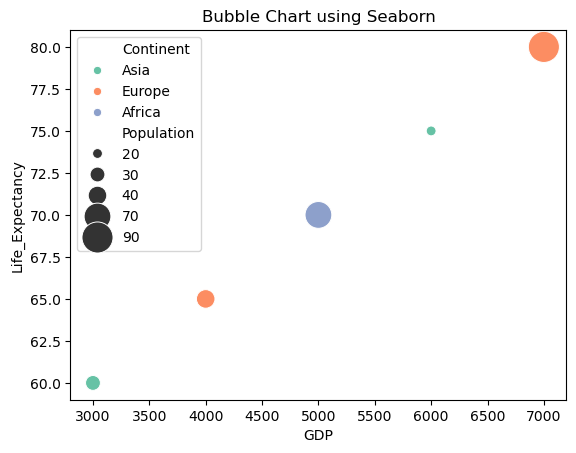

In [24]:
sns.scatterplot(data=df, x='GDP', y='Life_Expectancy', 
                size='Population', hue='Continent', 
                sizes=(50, 500), palette='Set2', legend='full')
plt.title('Bubble Chart using Seaborn')
plt.show()


### What is a Histogram?

A Histogram is a graphical representation of the distribution of a numerical variable.
It divides the data into intervals (bins) and shows how many values fall into each bin.

X-axis: Bins (ranges of values)

Y-axis: Frequency (count of values in each bin)

🎯 Used for: Checking distribution, skewness, outliers, and spread of data.

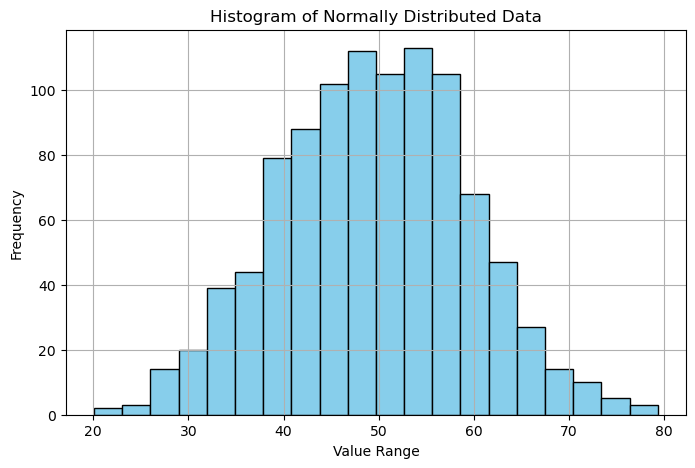

In [27]:
#Basic Histogram in Python
import matplotlib.pyplot as plt
import numpy as np

# Example: Normally distributed data
data = np.random.normal(loc=50, scale=10, size=1000)

plt.figure(figsize=(8,5))
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Normally Distributed Data')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


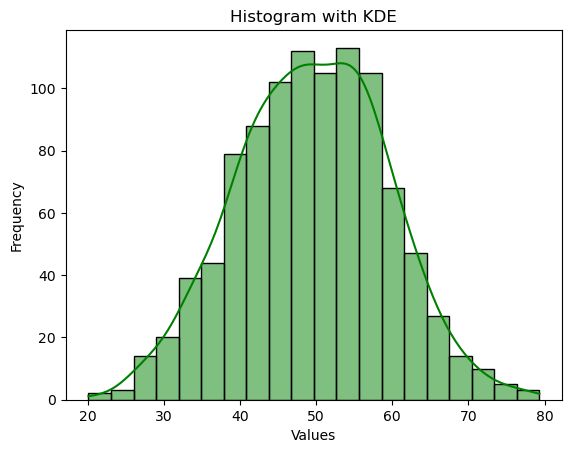

In [29]:
#Using seaborn (better styling & KDE)
import seaborn as sns

sns.histplot(data, bins=20, kde=True, color='green')  # `kde=True` adds a smooth curve
plt.title('Histogram with KDE')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()



### Histogram Parameters
| Parameter                  | Description                                  |
| -------------------------- | -------------------------------------------- |
| `bins`                     | Number of intervals or exact bin edges       |
| `color`                    | Color of bars                                |
| `edgecolor`                | Outline color of each bar                    |
| `alpha`                    | Transparency (0.0 to 1.0)                    |
| `density=True`             | Show probability instead of count            |
| `kde=True` (in seaborn)    | Add Kernel Density Estimate curve            |
| `stat='density'` (seaborn) | Normalizes the histogram to show probability |


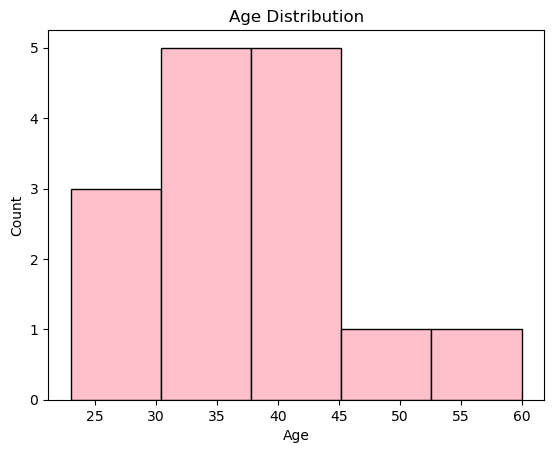

In [34]:
#Histogram for a DataFrame Column
import pandas as pd

df = pd.DataFrame({
    'Age': [23, 45, 31, 35, 33, 36, 29, 27, 40, 50, 60, 32, 39, 41, 42]
})

plt.hist(df['Age'], bins=5, color='pink', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


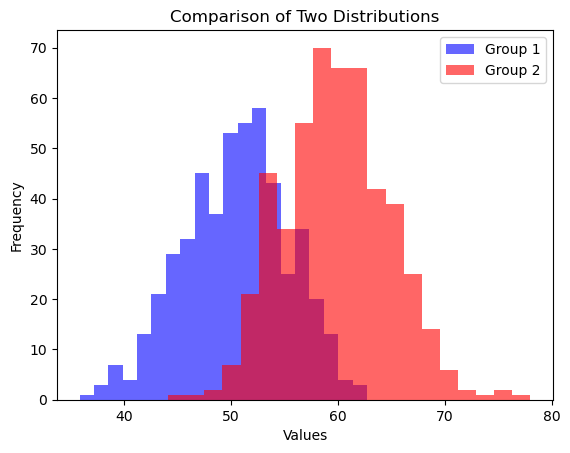

In [36]:
# Advanced Histogram (Multiple Series)
# Compare 2 groups
group1 = np.random.normal(50, 5, 500)
group2 = np.random.normal(60, 5, 500)

plt.hist(group1, bins=20, alpha=0.6, label='Group 1', color='blue')
plt.hist(group2, bins=20, alpha=0.6, label='Group 2', color='red')
plt.title('Comparison of Two Distributions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()



## 🔹 Histogram: Challenges & Solutions

### 1. **Choosing the Right Number of Bins**

* **Challenge**: Too few bins → hides detail. Too many → adds noise.
* **Solution**:

  * Use `bins='auto'` for automatic calculation.
  * Try different methods: `'sturges'`, `'fd'`, `'doane'`, etc.

  ```python
  plt.hist(data, bins='auto')  # or bins=20
  ```

---

### 2. **Overlapping Multiple Distributions**

* **Challenge**: Overlapping histograms may be unclear.
* **Solution**:

  * Use `alpha` for transparency.
  * Use KDE (Kernel Density Estimation) or step histograms.

  ```python
  plt.hist(data1, bins=20, alpha=0.5, label='Group 1')
  plt.hist(data2, bins=20, alpha=0.5, label='Group 2')
  plt.legend()
  ```

---

### 3. **Histogram Interpretation**

* **Challenge**: Users misinterpret frequency vs probability.
* **Solution**:

  * Add axis labels and explain scale.
  * Use `density=True` to show probability distribution instead of counts.

  ```python
  plt.hist(data, bins=30, density=True)
  ```

---

### 4. **Handling Outliers**

* **Challenge**: Outliers stretch the histogram, hiding useful shape.
* **Solution**:

  * Use `xlim()` to focus on the main range.
  * Use log scale if values span several orders of magnitude.

  ```python
  plt.xlim(0, 100)
  ```

---

## 🔹 Scatter Plot: Challenges & Solutions

### 1. **Overplotting (Too Many Points)**

* **Challenge**: Dense plots can hide patterns.
* **Solution**:

  * Use transparency (`alpha`).
  * Use smaller markers.
  * Try hexbin or density plots.

  ```python
  plt.scatter(x, y, alpha=0.3, s=10)
  ```

---

### 2. **No Clear Relationship**

* **Challenge**: Hard to identify patterns or clusters.
* **Solution**:

  * Color by category (with `c` or `hue` in Seaborn).
  * Add trend lines (regression).

  ```python
  sns.scatterplot(x='x', y='y', hue='group', data=df)
  sns.regplot(x='x', y='y', data=df)
  ```

---

### 3. **Multiple Groups**

* **Challenge**: Categorical variables not clear on scatter plot.
* **Solution**:

  * Use color (`c` or `hue`) or marker shape.
  * Add legend.

  ```python
  plt.scatter(x, y, c=group, cmap='viridis')
  ```

---

### 4. **Bubbles Not Scaled Properly**

* **Challenge**: Difficult to size markers meaningfully.
* **Solution**:

  * Scale area not radius; normalize sizes.

  ```python
  sizes = df['value'] * 10  # scale up
  plt.scatter(x, y, s=sizes)
  ```

---

n?
